In [12]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm




############# Get Data ####################################################
f=open('../readouts/simulationdata/efficiency.txt','r')
i1 = 0
i2 = 0
X = array([0,0,0])
for line in f:
    a = line.split()
    X = vstack((X,array([a[3],a[5],a[7]])))
X = X[1:,:]
X_ef = hstack((X[5:,:],X[0:5,:])).astype(float)

f=open('../readouts/simulationdata/eres.txt','r')
i1 = 0
i2 = 0
X = array([0,0,0])
for line in f:
    a = line.split()
    X = vstack((X,array([a[3],a[5],a[7]])))
X = X[1:,:]
X_er = hstack((X[5:,:],X[0:5,:])).astype(float)


f=open('../readouts/simulationdata/angular_resolution.txt','r')
i1 = 0
i2 = 0
X = array([0,0,0,0])
for line in f:
    a = line.split()
    X = vstack((X,array([a[3],a[5],a[7],a[9]])))
X = X[1:,:]
X_ar = hstack((X[7:,:],X[0:7,:])).astype(float)


f=open('../readouts/simulationdata/headtail.txt','r')
i1 = 0
i2 = 0
X = array([0,0,0,0])
for line in f:
    a = line.split()
    X = vstack((X,array([a[3],a[5],a[7],a[9]])))
X = X[1:,:]
X_ht = hstack((X[7:,:],X[0:7,:])).astype(float)
#################################################################







#################################################################
nE = 1000
E_max = 160.0
E = linspace(0.001, E_max, nE)


def eff(x):
    y =  x[0]/(1+exp(-x[1]*(E-x[2])))
    y[y>1.0] = 1.0
    y[y<0.0] = 0.0
    return y

def eres(x):
    return sqrt(x[0]**2/E**2+x[1]**2/E+x[2])

def angres(x):
    y = (x[0]/(1+ exp(-x[1]*(x[2]-E)))+x[3])
    y[y>57.3] = 57.3
    return y

def htth(x):
    y = (x[0]/(1+ exp(-x[1]*(E-x[2])))+x[3])
    y[y<0.5] = 0.5
    y[y>1.0] = 0.5
    return y

def GetCurves(x_ef,x_er,x_ar,x_ht,fname_i):
    data_er = zeros(shape=(nE,3))
    data_ef = zeros(shape=(nE,3))
    data_ar = zeros(shape=(nE,3))
    data_ht = zeros(shape=(nE,3))
    
    data_ar[:,0] = E
    data_ht[:,0] = E
    data_er[:,0] = E
    data_ef[:,0] = E
    
    data_er[:,1] = eres(x_er[0:3])
    data_er[:,2] = eres(x_er[3:])
        
    data_ef[:,1] = eff(x_ef[0:3])
    data_ef[:,2] = eff(x_ef[3:])
    
    data_ar[:,1] = angres(x_ar[0:4])
    data_ar[:,2] = angres(x_ar[4:])
    
    data_ht[:,1] = htth(x_ht[0:4])
    data_ht[:,2] = htth(x_ht[4:])
        
    
    return data_er,data_ef,data_ar,data_ht
#################################################################



#################################################################
# My names
fname = ["" for x in range(0,7)]
fname[0] ="Gem"
fname[1] ="Wire"
fname[2] ="Pad"
fname[3] ="Strip"
fname[4] ="Pixel"
fname[5] ="Postdrift"
fname[6] ="Predrift"
# Directories
froot_er = "-EnergyRes.txt"
fdir_er = "../readouts/energyres/"
froot_ef = "-Efficiency.txt"
fdir_ef = "../readouts/efficiency/"
froot_ar = "-AngRes.txt"
fdir_ar = "../readouts/angres/"
froot_ht = "-HeadTail.txt"
fdir_ht = "../readouts/headtail/"

for i in range(0,5):
    data_er,data_ef,data_ar,data_ht = GetCurves(X_ef[i,:],X_er[i,:],X_ar[i,:],X_ht[i,:],fname[i])
    savetxt(fdir_ef+fname[i]+froot_ef,data_ef, delimiter='\t')
    savetxt(fdir_er+fname[i]+froot_er,data_er, delimiter='\t')
    savetxt(fdir_ar+fname[i]+froot_ar,data_ar, delimiter='\t')
    savetxt(fdir_ht+fname[i]+froot_ht,data_ht, delimiter='\t')    
    
data_er,data_ef,data_ar,data_ht = GetCurves(X_ef[4,:],X_er[4,:],X_ar[5,:],X_ht[5,:],fname[5])
savetxt(fdir_ef+fname[5]+froot_ef,data_ef, delimiter='\t')
savetxt(fdir_er+fname[5]+froot_er,data_er, delimiter='\t')
savetxt(fdir_ar+fname[5]+froot_ar,data_ar, delimiter='\t')
savetxt(fdir_ht+fname[5]+froot_ht,data_ht, delimiter='\t')

data_er,data_ef,data_ar,data_ht = GetCurves(X_ef[4,:],X_er[4,:],X_ar[6,:],X_ht[6,:],fname[6])
savetxt(fdir_ef+fname[6]+froot_ef,data_ef, delimiter='\t')
savetxt(fdir_er+fname[6]+froot_er,data_er, delimiter='\t')
savetxt(fdir_ar+fname[6]+froot_ar,data_ar, delimiter='\t')
savetxt(fdir_ht+fname[6]+froot_ht,data_ht, delimiter='\t')
#################################################################

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently

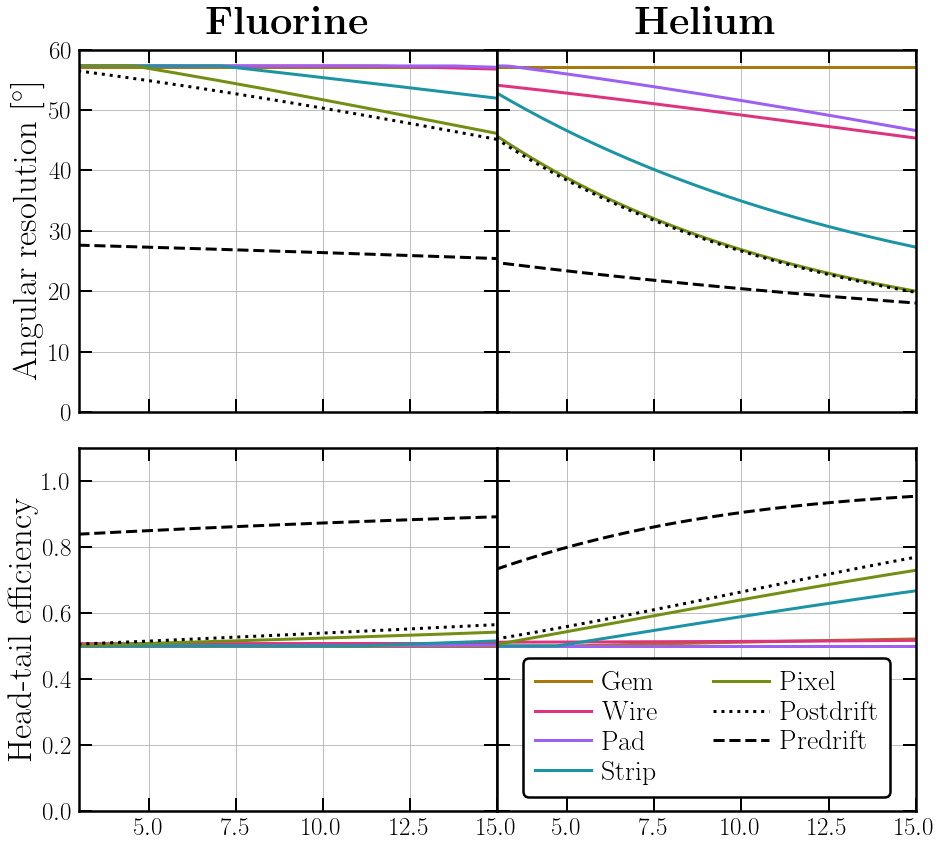

In [13]:
import matplotlib.gridspec as gridspec
import cmocean




wspace = 0.0
hspace = 0.1
lw=2.5
lfs=35
tfs=25
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)

ylabs = ['Angular resolution [$^\circ$]','Head-tail efficiency']

fig, axarr = plt.subplots(2, 2,figsize=(15,14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=wspace,hspace=hspace)
cols = cmocean.cm.phase(linspace(0,0.9,5))
ylims = array([[0,60],[0,1.1]])
    
for k in range(0,2):
    for i in range(0,5):
        data_er,data_ef,data_ar,data_ht = GetCurves(X_ef[i,:],X_er[i,:],X_ar[i,:],X_ht[i,:],fname[i])
        ax1 = plt.subplot(gs[0,k])
        ax2 = plt.subplot(gs[1,k])
        ax1.plot(data_ar[:,0],data_ar[:,1+k],lw=3,color=cols[i,:],label=fname[i])
        ax2.plot(data_ht[:,0],data_ht[:,1+k],lw=3,color=cols[i,:],label=fname[i])
            
    data_er,data_ef,data_ar,data_ht = GetCurves(X_ef[4,:],X_er[4,:],X_ar[5,:],X_ht[5,:],fname[5])
    ax1.plot(data_ar[:,0],data_ar[:,1+k],'k:',lw=3,label=fname[5])
    ax2.plot(data_ht[:,0],data_ht[:,1+k],'k:',lw=3,label=fname[5])
    
    data_er,data_ef,data_ar,data_ht = GetCurves(X_ef[4,:],X_er[4,:],X_ar[6,:],X_ht[6,:],fname[6])
    ax1.plot(data_ar[:,0],data_ar[:,1+k],'k--',lw=3,label=fname[6])
    ax2.plot(data_ht[:,0],data_ht[:,1+k],'k--',lw=3,label=fname[6])

for j in range(0,2):
    ax1 = plt.subplot(gs[j,0])
    ax2 = plt.subplot(gs[j,1])

    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xlim([3,15])
    ax1.set_xlim([3,15])
    ax1.set_ylim(ylims[j,:])
    ax2.set_ylim(ylims[j,:])
    ax1.set_ylabel(ylabs[j],fontsize=lfs)
        
    if j==0:
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])
        
    if j==3:
        ax1.set_xlabel(r'Energy [keV$_{\rm r}$]',fontsize=lfs)
        ax2.set_xlabel(r'Energy [keV$_{\rm r}$]',fontsize=lfs)
        
    if j==0:
        ax1.set_title(r'${\bf Fluorine}$',fontsize=lfs+5,pad=15)
        ax2.set_title(r'${\bf Helium}$',fontsize=lfs+5,pad=15)
    ax2.set_yticklabels([])
    ax1.grid('on')
    ax2.grid('on')
    
    if j==1:
        leg = ax2.legend(loc='lower center',frameon=True,fontsize=lfs-7,framealpha=1.0,labelspacing=0.1,ncol=2,handletextpad=0.4)
        leg.get_frame().set_linewidth(lw)
        leg.get_frame().set_edgecolor('k')

plt.show()
fig.savefig('../plots/energy-performance_new.pdf',bbox_inches='tight')


/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprec

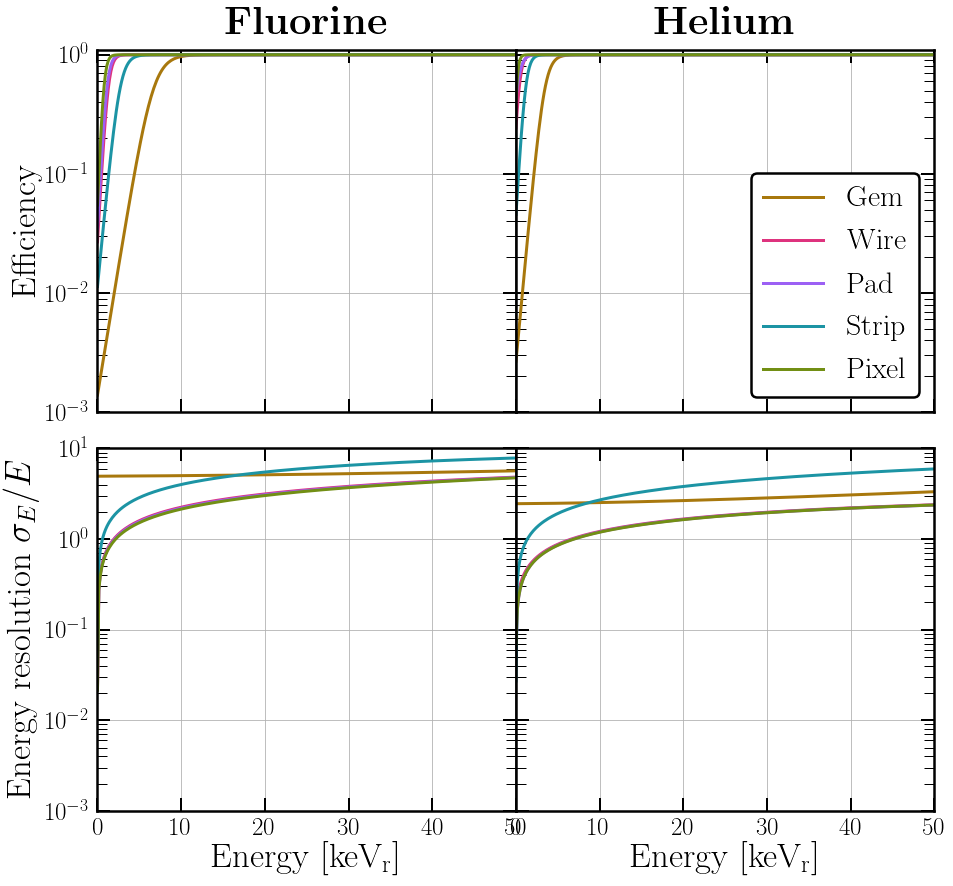

In [14]:
ylabs = ['Efficiency','Energy resolution $\sigma_E/E$']

fig, axarr = plt.subplots(2, 2,figsize=(15,14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=wspace,hspace=hspace)
ylims = array([[0.001,1.1],[0.001,10]])
    
for k in range(0,2):
    for i in range(0,5):
        data_er,data_ef,data_ar,data_ht = GetCurves(X_ef[i,:],X_er[i,:],X_ar[i,:],X_ht[i,:],fname[i])
        ax1 = plt.subplot(gs[0,k])
        ax2 = plt.subplot(gs[1,k])
        ax1.plot(data_ef[:,0],data_ef[:,1+k],lw=3,color=cols[i,:],label=fname[i])
        ax2.plot(data_er[:,0],data_er[:,0]*data_er[:,1+k],lw=3,color=cols[i,:],label=fname[i])

for j in range(0,2):
    ax1 = plt.subplot(gs[j,0])
    ax2 = plt.subplot(gs[j,1])

    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)

    ax1.set_ylim(ylims[j,:])
    ax2.set_ylim(ylims[j,:])
    ax1.set_ylabel(ylabs[j],fontsize=lfs)
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax1.set_xlim([0,50])
    ax2.set_xlim([0,50])
        
    if j==0 or j==2:
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])
        
    if j==1:
        ax1.set_xlabel(r'Energy [keV$_{\rm r}$]',fontsize=lfs)
        ax2.set_xlabel(r'Energy [keV$_{\rm r}$]',fontsize=lfs)
        
    if j==0:
        ax1.set_title(r'${\bf Fluorine}$',fontsize=lfs+5,pad=15)
        ax2.set_title(r'${\bf Helium}$',fontsize=lfs+5,pad=15)
    ax2.set_yticklabels([])
    ax1.grid('on')
    ax2.grid('on')
    
    if j==0:
        leg = ax2.legend(loc='lower right',frameon=True,fontsize=lfs-5,framealpha=1.0)
        leg.get_frame().set_linewidth(lw)
        leg.get_frame().set_edgecolor('k')
        
plt.show()
fig.savefig('../plots/energy-performance_new.pdf',bbox_inches='tight')


In [11]:
# Pixel efficiency and energy resolution for Non-directiona
data_er,data_ef,data_ar,data_ht = GetCurves(X_ef[4,:],X_er[4,:],X_ar[4,:],X_ht[4,:],'Nondirectional')
savetxt(fdir_ef+'Nondirectional'+froot_ef,data_ef, delimiter='\t')
savetxt(fdir_er+'Nondirectional'+froot_er,data_er, delimiter='\t')
savetxt(fdir_er+"Ideal"+froot_er,data_er, delimiter='\t')
savetxt(fdir_ef+"Ideal"+froot_ef,data_ef, delimiter='\t')

# Perfect headtail and ang res for ideal and non-directional
data_ar[:,1] = 0.0
data_ar[:,2] = 0.0
data_ht[:,1] = 1.0
data_ht[:,1] = 1.0
savetxt(fdir_ar+"Ideal"+froot_ar,data_ar, delimiter='\t')
savetxt(fdir_ht+"Ideal"+froot_ht,data_ht, delimiter='\t')
savetxt(fdir_ht+"Nondirectional"+froot_ht,data_ht, delimiter='\t')
savetxt(fdir_ar+"Nondirectional"+froot_ar,data_ar, delimiter='\t')

In [20]:
fname[4]

'Pixel'